# IBM HR Employee Attrition

## Introduction

**Background:**

Employee attrition, or turnover, is a significant challenge for companies as it impacts productivity, morale, and financial performance. High attrition rates can lead to increased recruitment and training costs, loss of experienced employees, and disruptions in workflow. Understanding the factors contributing to employee attrition can help organizations develop targeted strategies to improve employee retention and reduce turnover costs.

**Objective:**

The primary objective of this project is to analyze the IBM HR Employee Attrition dataset to identify patterns and factors that contribute to employee attrition. By exploring the relationships between various employee attributes and their likelihood of leaving the company, we aim to uncover actionable insights that can inform HR policies and retention strategies.

**Dataset Description:**

The dataset used in this project is the IBM HR Analytics Employee Attrition dataset, available on Kaggle. It contains data on 1,470 employees, with 35 features that describe various aspects of their work environment, personal characteristics, and job satisfaction levels. **Key features include:**

- Personal Information: Age, Gender, Marital Status, Education, etc.
- Job-Related Information: Job Role, Department, Job Level, Years at Company, Years in Current Role, etc.
- Compensation and Benefits: Monthly Income, Stock Option Level, etc.
- Performance Metrics: Job Satisfaction, Performance Rating, Work-Life Balance, etc.
- Behavioral Indicators: Overtime, Distance from Home, Business Travel, etc.

The target variable is **'Attrition,'** which indicates whether an employee left the company ('Yes') or stayed ('No').

**Goals:**

1. Identify Key Factors: Determine which factors are most strongly associated with employee attrition.
2. Predictive Modeling: Build predictive models to classify employees into attrition and non-attrition categories based on their attributes.


**Scope of Analysis:**

- We will conduct Exploratory Data Analysis (EDA) to understand the distribution and relationships between the variables.
- We will preprocess the data by handling missing values, encoding categorical variables, and scaling numerical features.
- We will build multiple machine learning models, including Logistic Regression, KNN, Decision Tree, Random Forest, SVM, GradientBoost, AdaBoost, and XGBoost models to predict employee attrition.
- Model performance will be evaluated using metrics such as accuracy, precision, recall, and F1-score.

**By the end of this analysis, we aim to provide a comprehensive understanding of employee attrition at IBM and deliver actionable insights that can help reduce turnover and improve employee engagement.**

# Import Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Load The Data

In [4]:
df = pd.read_csv('hr_employee.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


# Data Overview

In [ ]:
# Descriptive Analysis
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
df.describe(include='object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


# EDA

### Target Variable: Attrition

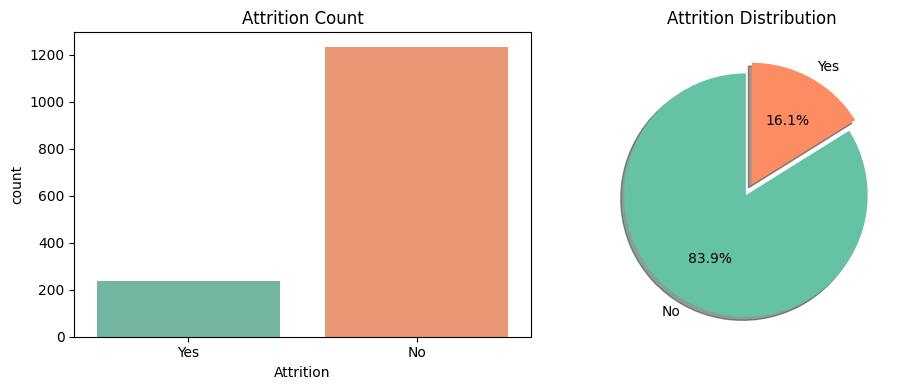

In [ ]:
# Attrition Distribution
plt.figure(figsize=(10, 4))

# Count Plot of Attrition
plt.subplot(1, 2, 1)
sns.countplot(x='Attrition', data=df, palette='Set2')
plt.title('Attrition Count')

# Pie Chart of Attrition
plt.subplot(1, 2, 2)
attrition_counts = df['Attrition'].value_counts()
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%',
        startangle=90,explode =(0.1,0), shadow=True, colors=sns.color_palette('Set2'))
plt.title('Attrition Distribution')

plt.tight_layout()
plt.show()


The dataset is imbalanced

### Age

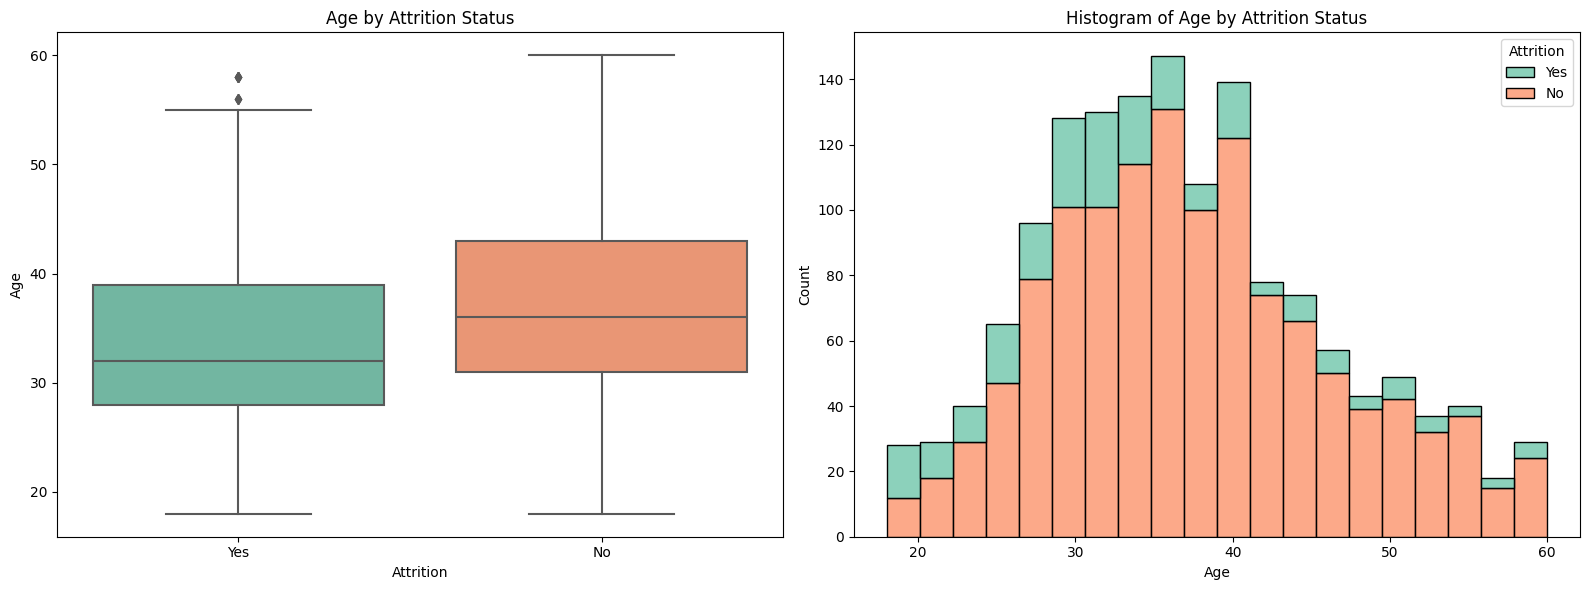

In [ ]:
# Attrition by Age Distribution
plt.figure(figsize=(16, 6))

# Box Plot of Age by Attrition
plt.subplot(1, 2, 1)
sns.boxplot(x='Attrition', y='Age', data=df, palette='Set2')
plt.title('Age by Attrition Status')

# Histogram of Age by Attrition
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Age', hue='Attrition', multiple='stack', bins=20, palette='Set2')
plt.title('Histogram of Age by Attrition Status')

plt.tight_layout()
plt.show()


We observed that younger employees have a higher attrition rate, and this could indicate that they are more likely to leave the company, possibly for better opportunities or due to lack of experience.

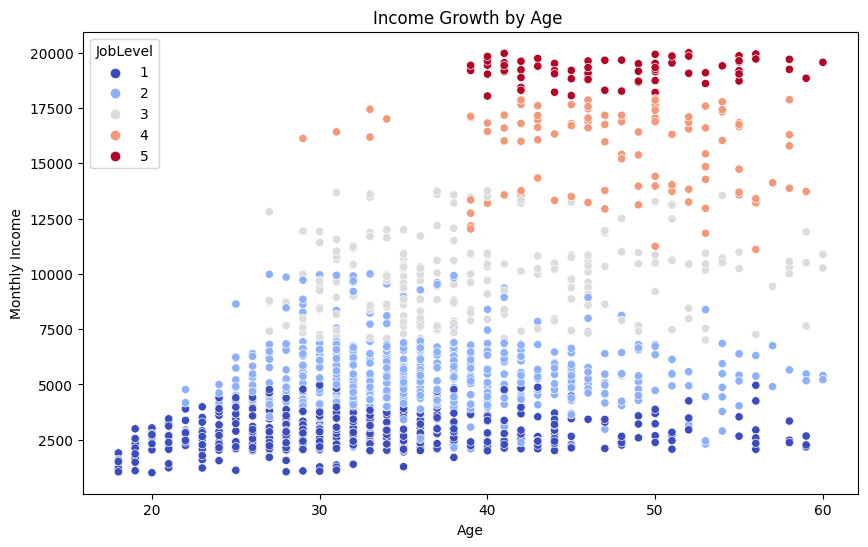

In [ ]:
# Displaying the relationship between the monthly income and age within job levels
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='MonthlyIncome', hue='JobLevel', data=df, palette='coolwarm')
plt.title('Income Growth by Age ')
plt.xlabel('Age')
plt.ylabel('Monthly Income')
plt.show()


We observe that monthly income tends to increase with age. This trend likely reflects the accumulation of experience and career progression over time, as older employees may have had more opportunities for promotions and raises.

### Job Role

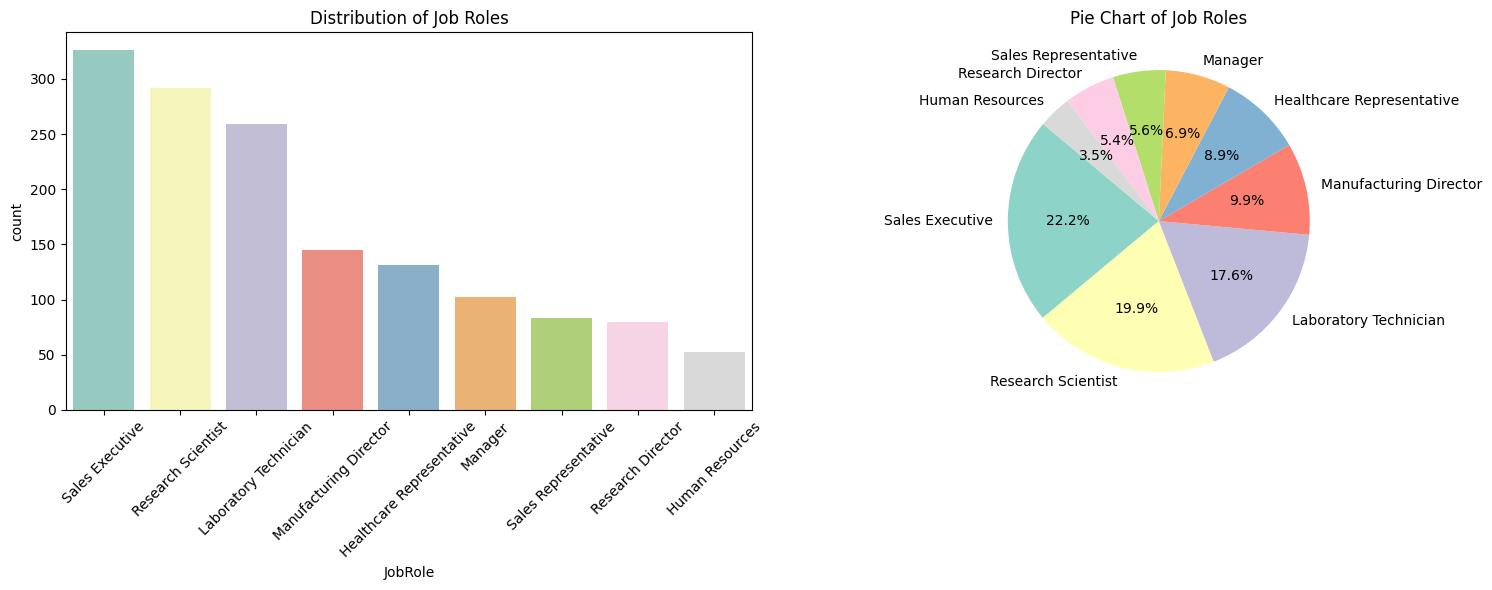

In [ ]:
# Job Role Distribution
plt.figure(figsize=(16, 6))

# Bar Plot of Job Role Distribution
plt.subplot(1, 2, 1)
sns.countplot(x='JobRole', data=df, palette='Set3')
plt.title('Distribution of Job Roles')
plt.xticks(rotation=45)

# Pie Chart of Job Role Distribution
plt.subplot(1, 2, 2)
job_role_counts = df['JobRole'].value_counts()
plt.pie(job_role_counts, labels=job_role_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3'))
plt.title('Pie Chart of Job Roles')

plt.tight_layout()
plt.show()


In [ ]:
df[df['Attrition'] == 'Yes']['JobRole'].value_counts()

Laboratory Technician        62
Sales Executive              57
Research Scientist           47
Sales Representative         33
Human Resources              12
Manufacturing Director       10
Healthcare Representative     9
Manager                       5
Research Director             2
Name: JobRole, dtype: int64

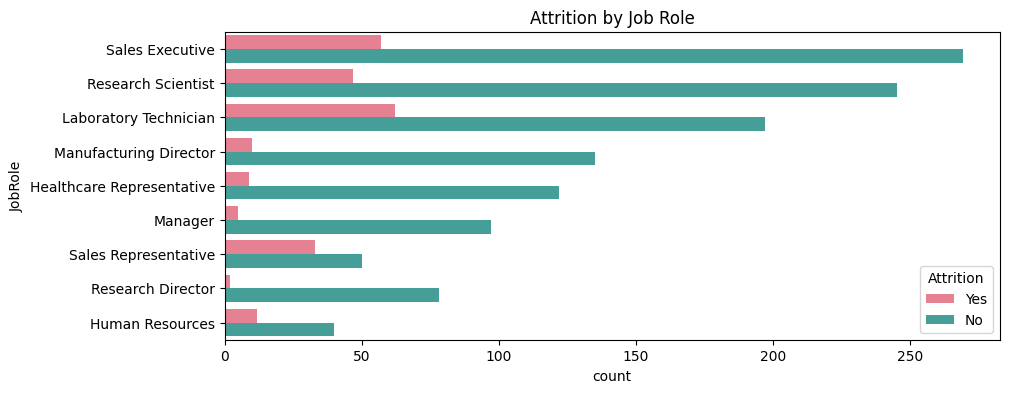

In [ ]:
# Attrition by Job Role
plt.figure(figsize=(10,4))
sns.countplot(y="JobRole", hue="Attrition", data=df, palette='husl')
plt.title("Attrition by Job Role")
plt.show()



**This visualization can help identify which roles are more prone to attrition.**

Certain job roles might have higher attrition rates due to job stress, dissatisfaction, or other factors.
- And one of them is Laboratory Technician as it has the highest attrition rates.


### Job Levels

In [ ]:
df[df['Attrition'] == 'Yes']['JobLevel'].value_counts()

1    143
2     52
3     32
5      5
4      5
Name: JobLevel, dtype: int64

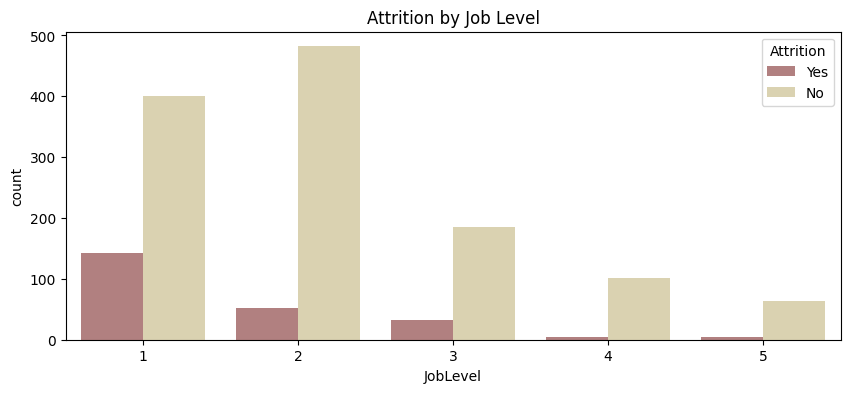

In [ ]:
# Attrition by job level
plt.figure(figsize=(10,4))
sns.countplot(x="JobLevel", hue="Attrition", data=df, palette='pink')
plt.title("Attrition by Job Level")
plt.show()



**Higher job levels might be associated with lower attrition rates due to better compensation and job satisfaction.**
 - The lower job levels show higher attrition, this may indicate that entry-level employees are more likely to leave.

Higher attrition rates in certain roles or levels can indicate dissatisfaction, lack of career progression, or job stress.

### Department

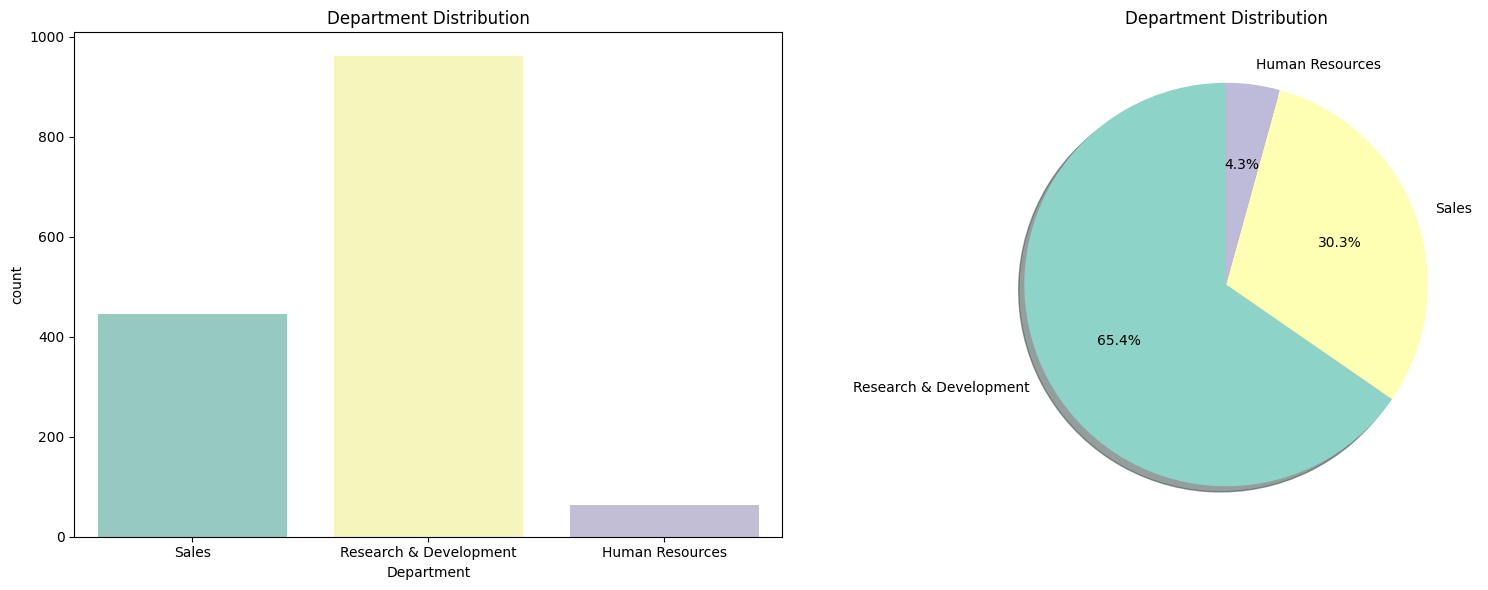

In [ ]:
# Department Distribution
plt.figure(figsize=(16, 6))

# Bar Plot of Department Distribution
plt.subplot(1, 2, 1)
sns.countplot(x='Department', data=df, palette='Set3')
plt.title('Department Distribution')

# Pie Chart of Department Distribution
plt.subplot(1, 2, 2)
dept_counts = df['Department'].value_counts()
plt.pie(dept_counts, labels=dept_counts.index, shadow=True,
        autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))
plt.title('Department Distribution')

plt.tight_layout()
plt.show()


In [ ]:
df[df['Attrition'] == 'Yes']['Department'].value_counts()

Research & Development    133
Sales                      92
Human Resources            12
Name: Department, dtype: int64

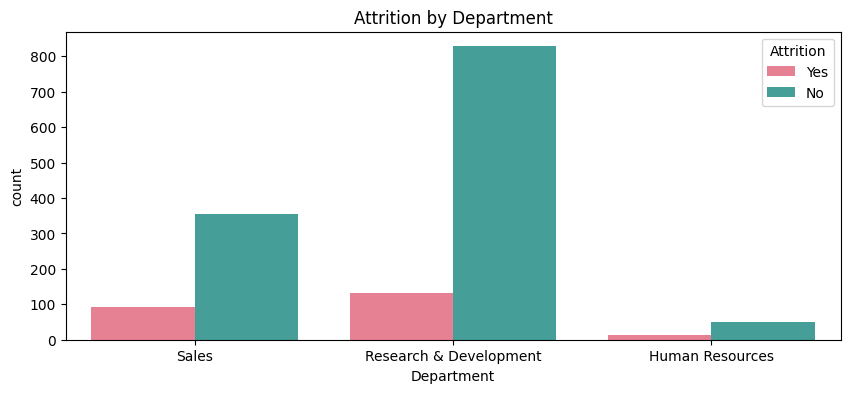

In [ ]:
# Attrition by Departments
plt.figure(figsize=(10,4))
sns.countplot(x="Department", hue="Attrition", data=df, palette ='husl')
plt.title("Attrition by Department")
plt.show()



**Different departments may have varying attrition rates due to the nature of work, work culture, or management style.**
- The Research & Development department has a significantly higher attrition rate, and this may warrant a deeper investigation into the causes, such as workload, management, or job satisfaction.

### Monthly Income

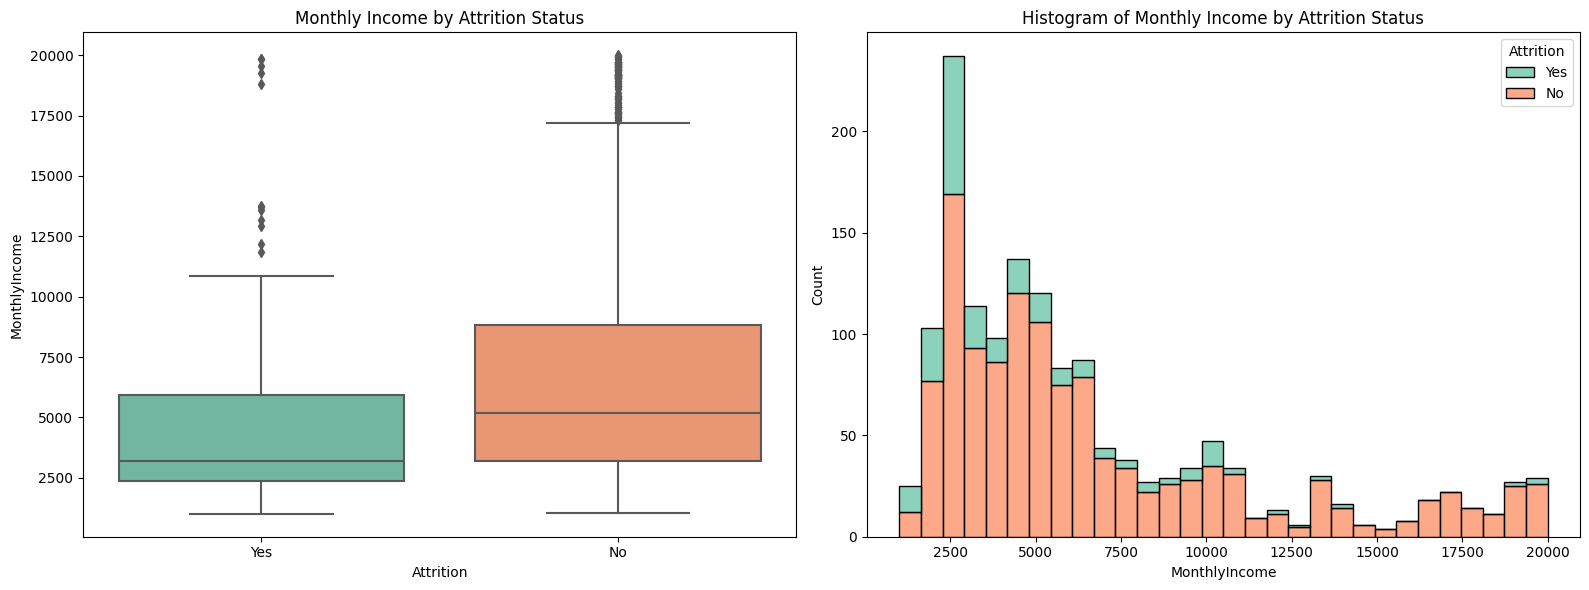

In [ ]:
# Attrition by Monthly Income
plt.figure(figsize=(16, 6))

# Box Plot of Monthly Income by Attrition
plt.subplot(1, 2, 1)
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, palette='Set2')
plt.title('Monthly Income by Attrition Status')

# Histogram of Monthly Income by Attrition
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='MonthlyIncome', hue='Attrition', multiple='stack', bins=30, palette='Set2')
plt.title('Histogram of Monthly Income by Attrition Status')

plt.tight_layout()
plt.show()


- Income levels may impact an employee’s decision to stay or leave the company. Lower-paid employees might have higher attrition rates.
- As we can see the attrition is higher among employees with lower incomes, this could suggest that salary increases might help reduce turnover.


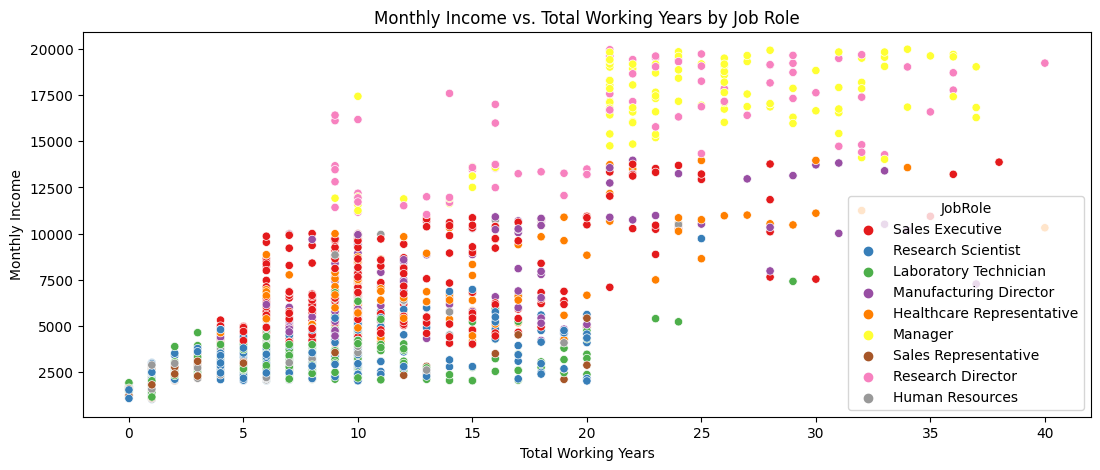

In [ ]:
# Relationship between income and experience by job roles
plt.figure(figsize=(13, 5))

# Monthly Income vs. Total Working Years by Job Role
sns.scatterplot(x='TotalWorkingYears', y='MonthlyIncome', hue='JobRole', data=df, palette='Set1')
plt.title('Monthly Income vs. Total Working Years by Job Role')
plt.xlabel('Total Working Years')
plt.ylabel('Monthly Income')
plt.show()

This plot allows us to see if more experienced employees (with more working years) tend to earn more, and whether this relationship varies by job role or not.

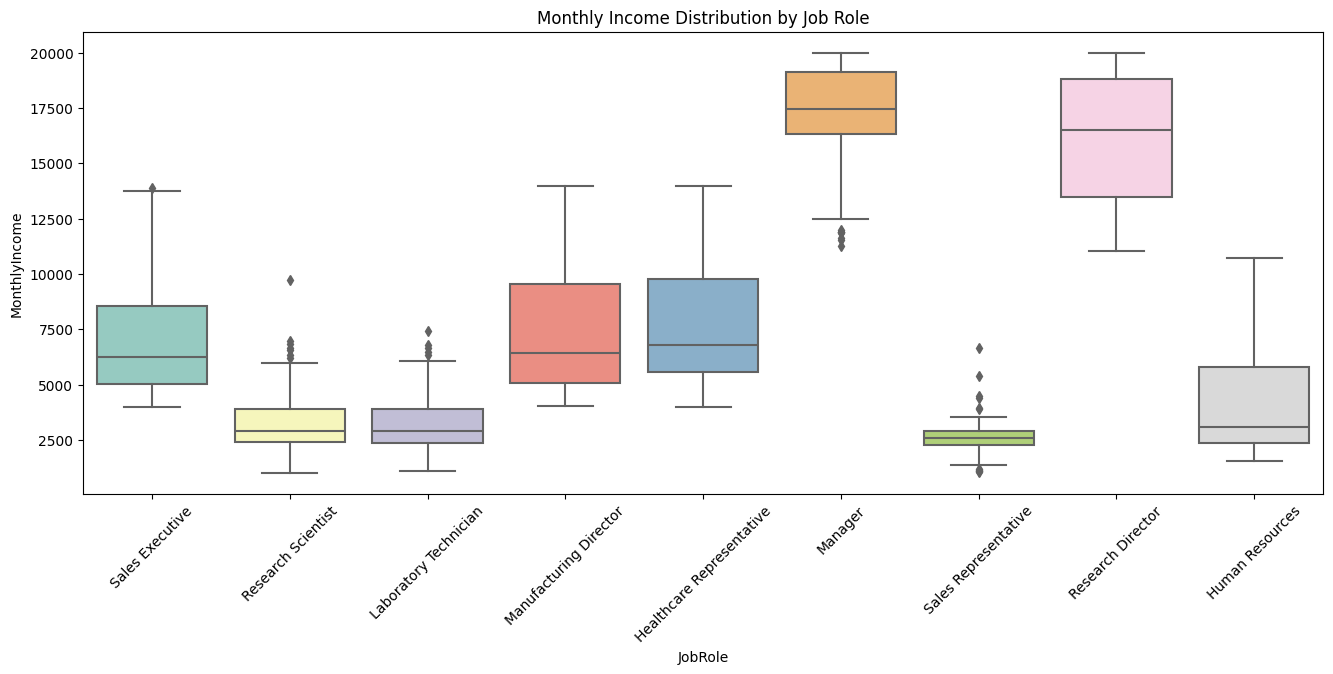

In [ ]:
# Monthly income by job role
plt.figure(figsize=(16, 6))

# Violin plot of Monthly Income by Job Role
sns.boxplot(x='JobRole', y='MonthlyIncome', data=df, palette='Set3')
plt.title('Monthly Income Distribution by Job Role')
plt.xticks(rotation=45)
plt.show()


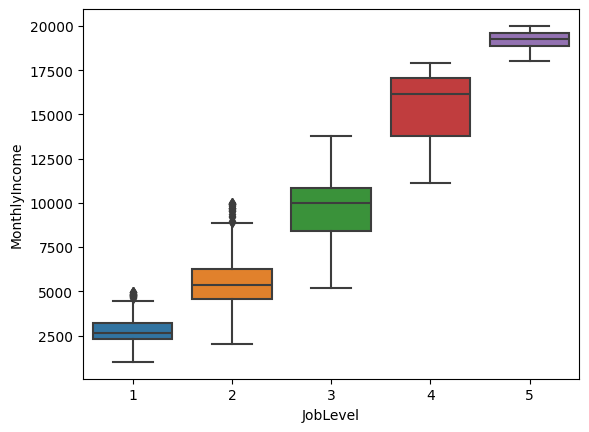

In [ ]:
# Displaying the relationship between the Monthly income and job level
sns.boxplot(y ='MonthlyIncome', x='JobLevel', data =df)
plt.show()

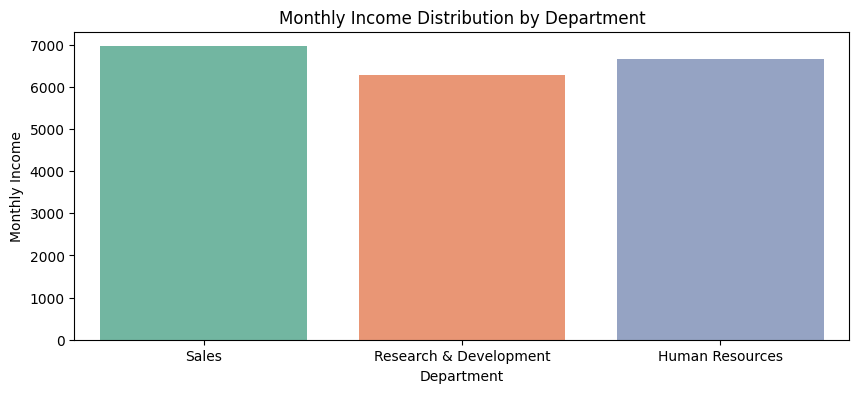

In [ ]:
# Monthly Income by Department
plt.figure(figsize=(10, 4))

# Box plot of Monthly Income by Department
sns.barplot(x='Department', y='MonthlyIncome', data=df, palette='Set2', ci =None)
plt.title('Monthly Income Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Monthly Income')
plt.show()


Certain job roles and departments offer higher salaries, suggesting these roles might require more specialized skills or hold greater responsibility.

### Education Fields

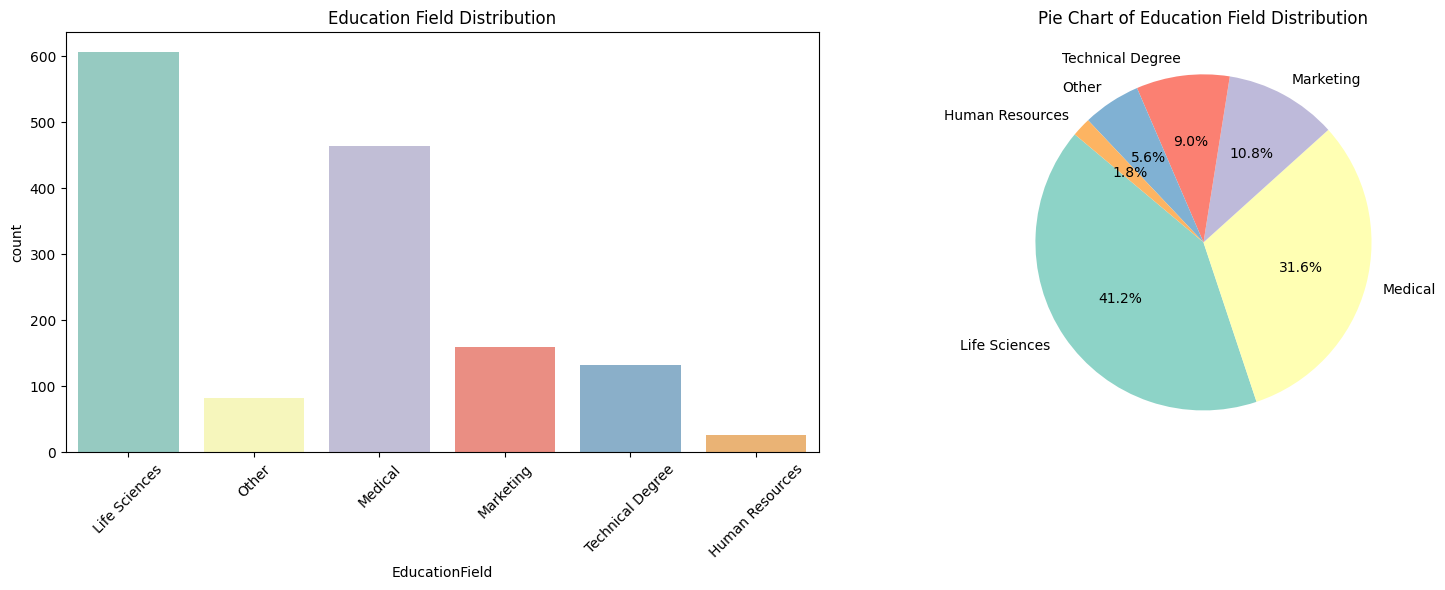

In [ ]:
# Education fields Distribution
plt.figure(figsize=(16, 6))

# Bar Plot of Education Field Distribution
plt.subplot(1, 2, 1)
sns.countplot(x='EducationField', data=df, palette='Set3')
plt.title('Education Field Distribution')
plt.xticks(rotation=45)

# Pie Chart of Education Field Distribution
plt.subplot(1, 2, 2)
edu_field_counts = df['EducationField'].value_counts()
plt.pie(edu_field_counts, labels=edu_field_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3'))
plt.title('Pie Chart of Education Field Distribution')

plt.tight_layout()
plt.show()


In [ ]:
df[df['Attrition'] == 'Yes']['EducationField'].value_counts()

Life Sciences       89
Medical             63
Marketing           35
Technical Degree    32
Other               11
Human Resources      7
Name: EducationField, dtype: int64

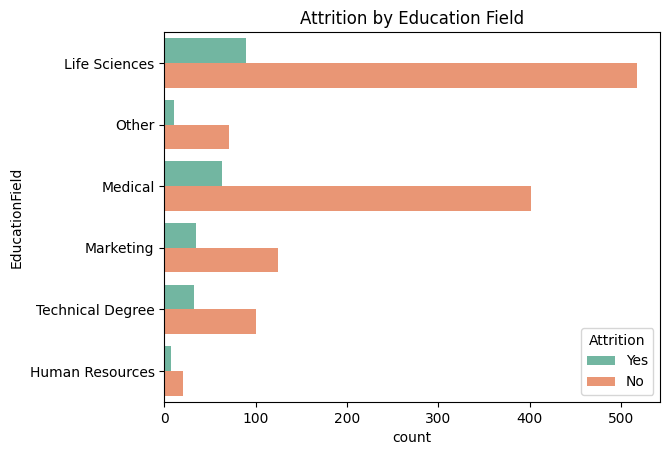

In [ ]:
# Attrition by Education Fields
sns.countplot(y="EducationField", hue="Attrition", data=df, palette='Set2')
plt.title("Attrition by Education Field")
plt.show()



- Certain educational backgrounds might be linked to higher attrition, perhaps due to better job opportunities in specific fields.
- Identifying fields with higher attrition rates like the Life Sciences field can help in tailoring retention strategies for employees from those fields.

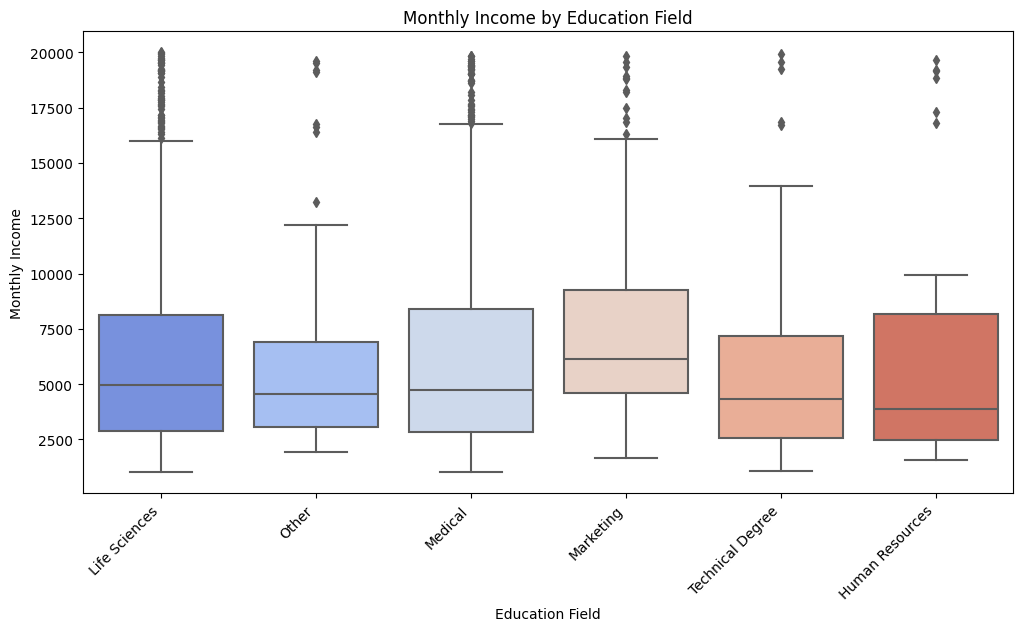

In [ ]:
# Identifying which education fields tend to have higher or lower incomes
plt.figure(figsize=(12, 6))
sns.boxplot(x='EducationField', y='MonthlyIncome', data=df, palette='coolwarm')
plt.title('Monthly Income by Education Field')
plt.xlabel('Education Field')
plt.ylabel('Monthly Income')
plt.xticks(rotation=45, ha='right')
plt.show()


Marketing field has the higher range of salaries followed by Medical field.

In [ ]:
df[df['Attrition'] == 'Yes']['Education'].value_counts()

3    99
4    58
2    44
1    31
5     5
Name: Education, dtype: int64

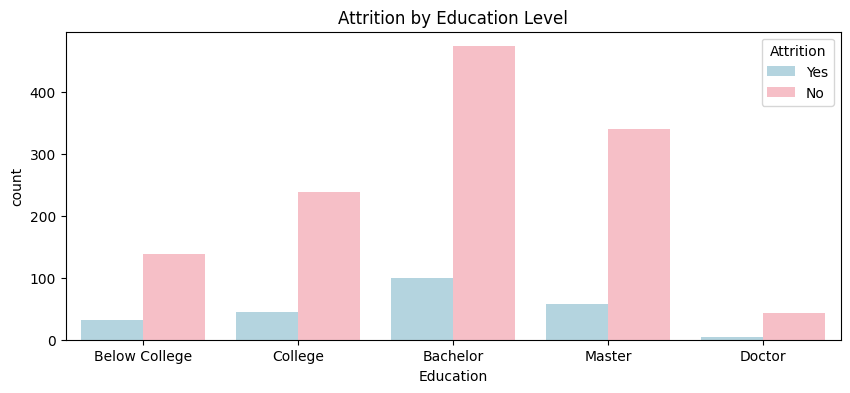

In [ ]:
# Attrition by education level
plt.figure(figsize=(10,4))
sns.countplot(x="Education", hue="Attrition", data=df, palette = ['#add8e6', '#ffb6c1'])
plt.title("Attrition by Education Level")

# Setting the labels for the x-axis
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['Below College', 'College', 'Bachelor', 'Master', 'Doctor'])
plt.show()


**The level of education may influence an employee's likelihood of staying with the company. Higher education levels might correlate with higher aspirations or better opportunities elsewhere.**
- The employees with a higher education level like (Bachelor and Master) show a higher attrition rate, this could suggest that they have more opportunities and may leave for better prospects.

### Years at Company

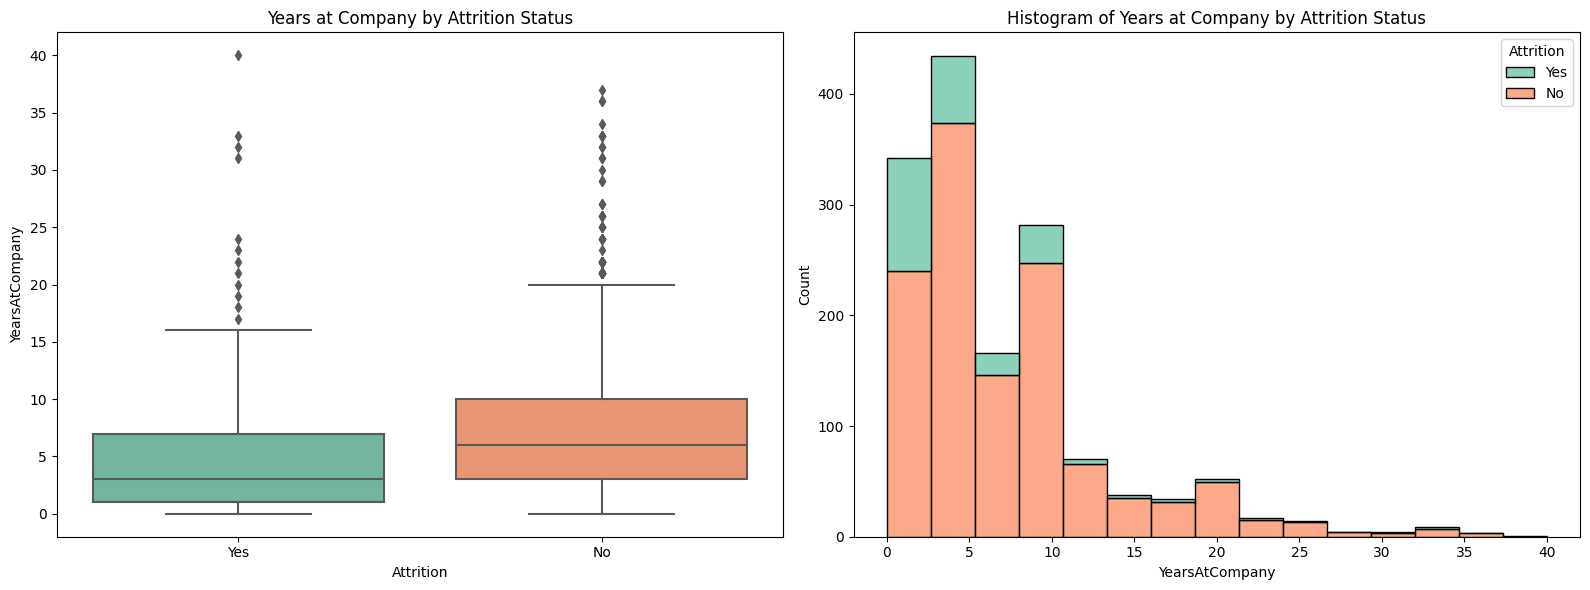

In [ ]:
# Attrition by Years at company distribution
plt.figure(figsize=(16, 6))

# Box Plot of Years at Company by Attrition
plt.subplot(1, 2, 1)
sns.boxplot(x='Attrition', y='YearsAtCompany', data=df, palette='Set2')
plt.title('Years at Company by Attrition Status')

# Histogram of Years at Company by Attrition
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='YearsAtCompany', hue='Attrition', multiple='stack', bins=15, palette='Set2')
plt.title('Histogram of Years at Company by Attrition Status')

plt.tight_layout()
plt.show()


Employees with fewer years at the company may be more likely to leave, as they might still be exploring better opportunities or not fully integrated into the company culture.

### Marital Status

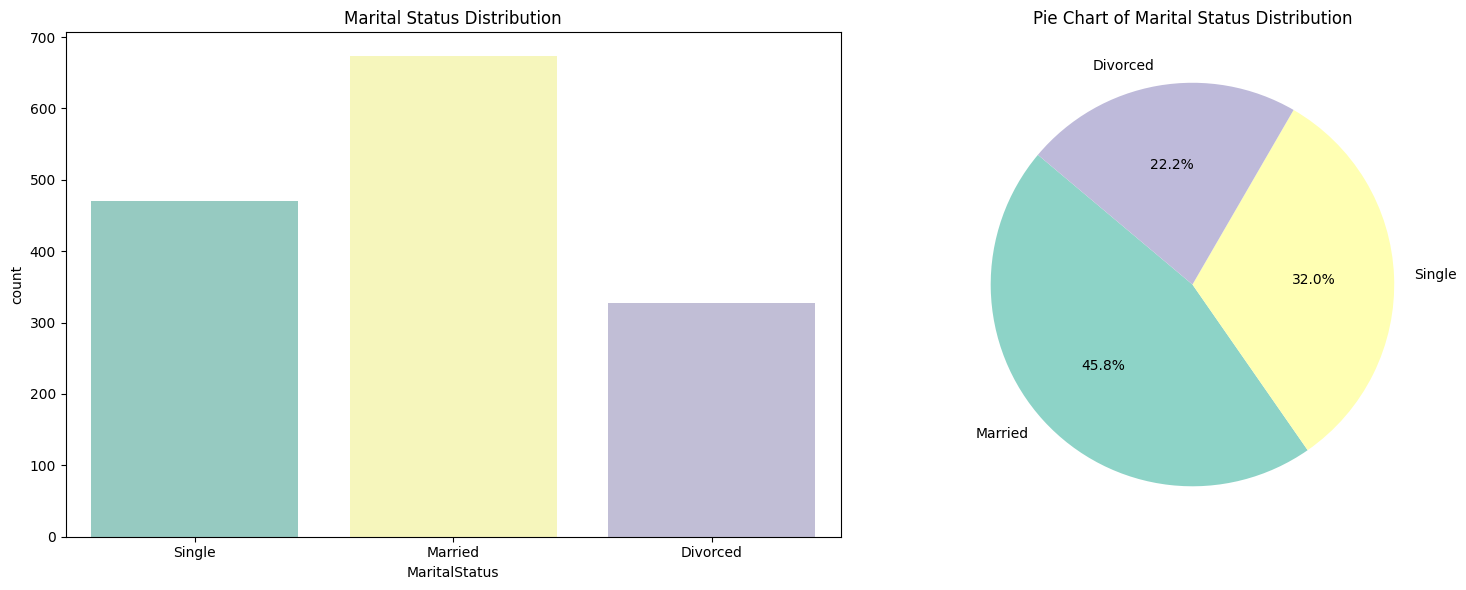

In [ ]:
# Marital Status Distribution
plt.figure(figsize=(16, 6))

# Bar Plot of Marital Status Distribution
plt.subplot(1, 2, 1)
sns.countplot(x='MaritalStatus', data=df, palette='Set3')
plt.title('Marital Status Distribution')

# Pie Chart of Marital Status Distribution
plt.subplot(1, 2, 2)
marital_status_counts = df['MaritalStatus'].value_counts()
plt.pie(marital_status_counts, labels=marital_status_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3'))
plt.title('Pie Chart of Marital Status Distribution')

plt.tight_layout()
plt.show()


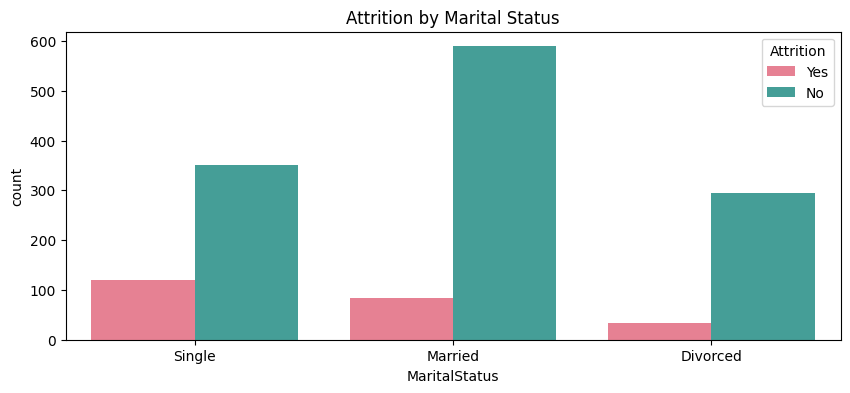

In [ ]:
# Attrition by Marital Status
plt.figure(figsize=(10,4))
sns.countplot(x="MaritalStatus", hue="Attrition", data=df, palette ='husl')
plt.title("Attrition by Marital Status")
plt.show()



- Marital status might influence attrition rates, as single employees may be more mobile or willing to change jobs frequently.
- The single employees show a higher attrition rate, and this might indicate that they are more likely to leave compared to married or divorced employees.

### Work-Life Balance

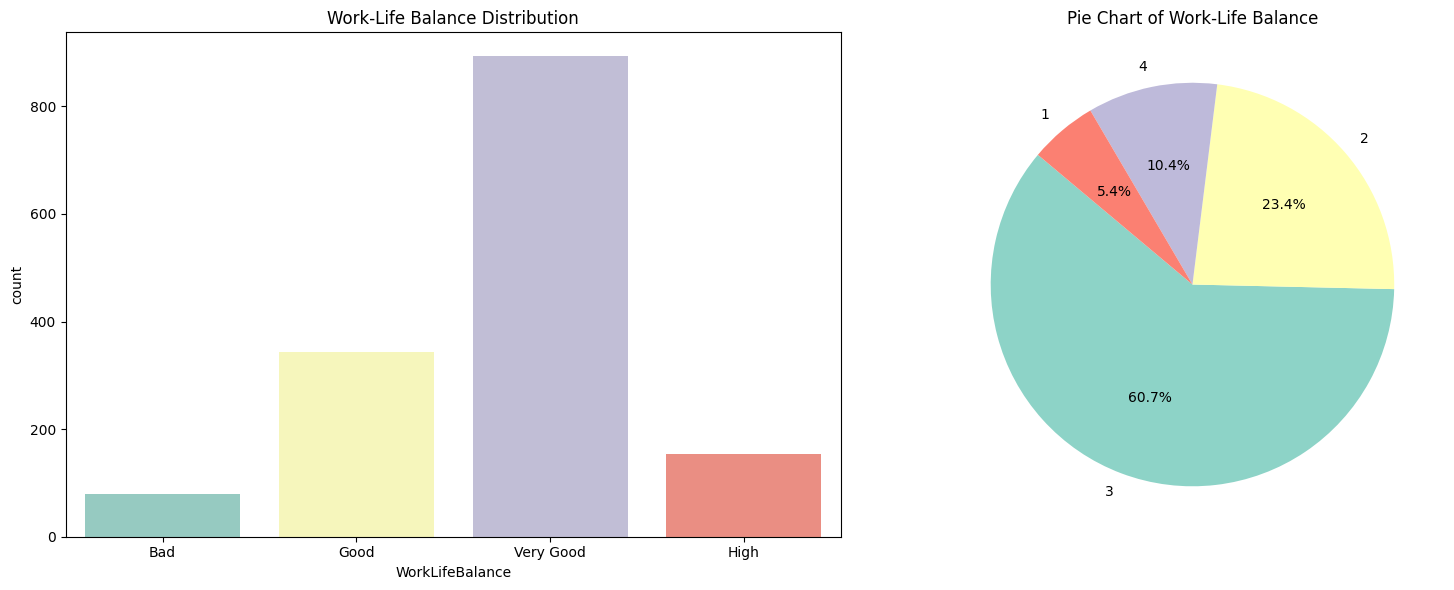

In [ ]:
# Works Life balance
plt.figure(figsize=(16, 6))

# Bar Plot of Work-Life Balance
plt.subplot(1, 2, 1)
sns.countplot(x='WorkLifeBalance', data=df, palette='Set3')
plt.title('Work-Life Balance Distribution')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Bad', 'Good', 'Very Good', 'High'])


# Pie Chart of Work-Life Balance
plt.subplot(1, 2, 2)
work_life_counts = df['WorkLifeBalance'].value_counts()
plt.pie(work_life_counts, labels=work_life_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3'))
plt.title('Pie Chart of Work-Life Balance')

plt.tight_layout()
plt.show()


In [ ]:
df[df['Attrition'] == 'Yes']['WorkLifeBalance'].value_counts()

3    127
2     58
4     27
1     25
Name: WorkLifeBalance, dtype: int64

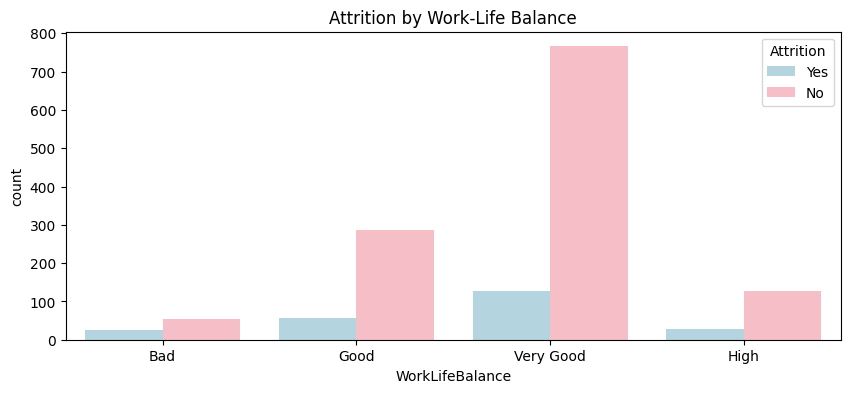

In [ ]:
# Attrition by Work life balance
plt.figure(figsize=(10,4))
sns.countplot(x="WorkLifeBalance", hue="Attrition", data=df, palette=['#add8e6', '#ffb6c1'])
plt.title("Attrition by Work-Life Balance")

# Setting the labels for the x-axis
plt.xticks(ticks=[0, 1, 2, 3], labels=['Bad', 'Good', 'Very Good', 'High'])

plt.show()



Most of the employees have a  better work life balance rate, but still have the highest Attrition rate among all.

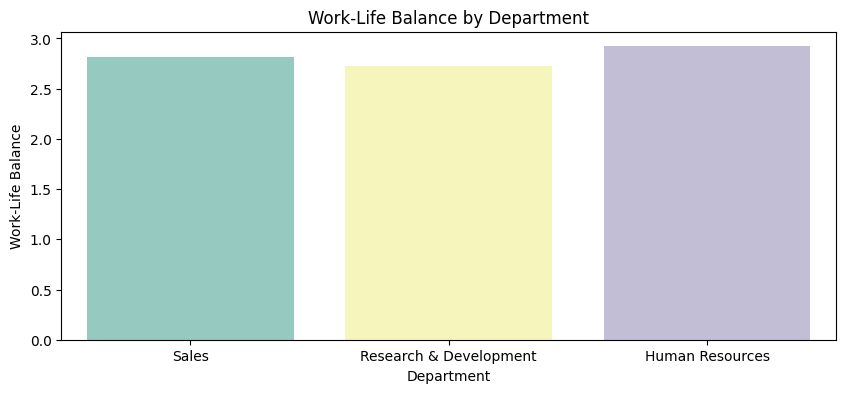

In [ ]:
# Work-Life Balance by Departments

plt.figure(figsize=(10,4))

# Bar plot of Work-Life Balance by Department
sns.barplot(x='Department', y='WorkLifeBalance', data=df, palette='Set3', ci=None)
plt.title('Work-Life Balance by Department')
plt.xlabel('Department')
plt.ylabel('Work-Life Balance')
plt.show()

The **Research & Development** department has a lower average score compared to 'Human Resources' or 'Research & Development,' and this might suggest that Research & Development employees feel more overworked or stressed.

### Total Working Years

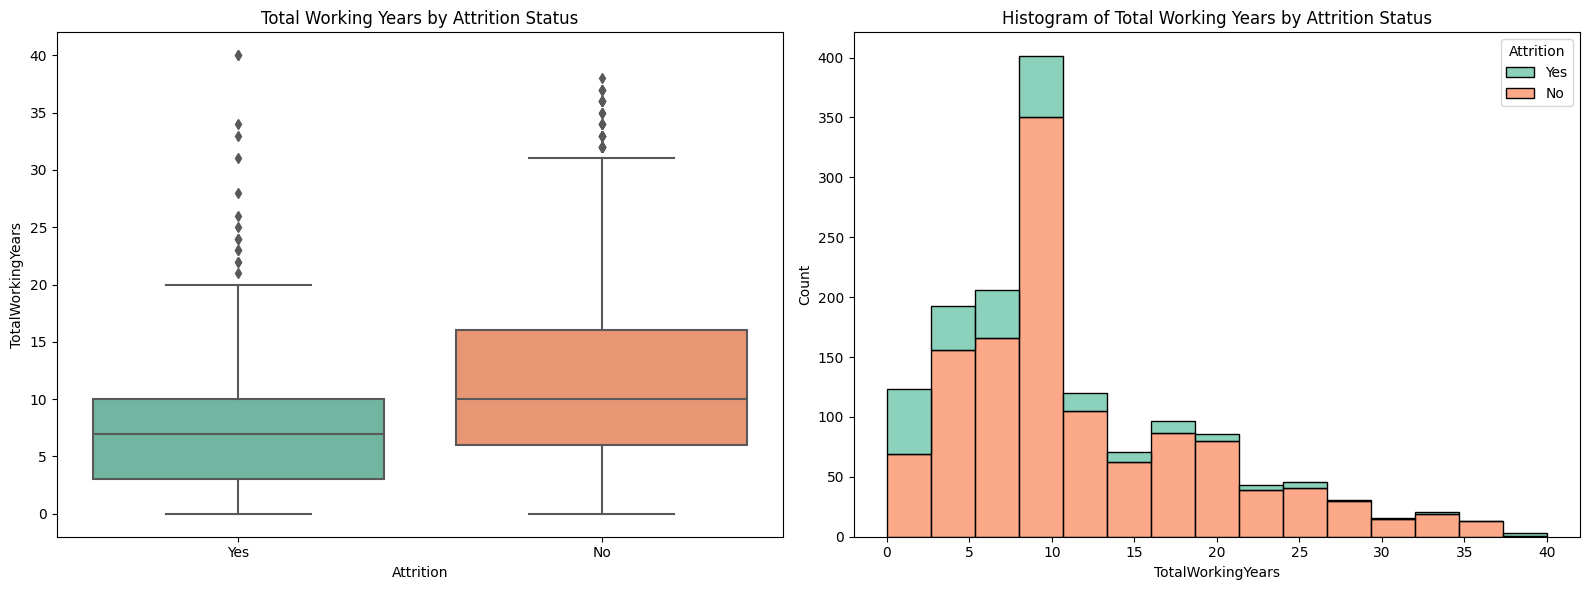

In [ ]:
# Attrition by Total Working Years
plt.figure(figsize=(16, 6))

# Box Plot of Total Working Years by Attrition
plt.subplot(1, 2, 1)
sns.boxplot(x='Attrition', y='TotalWorkingYears', data=df, palette='Set2')
plt.title('Total Working Years by Attrition Status')

# Histogram of Total Working Years by Attrition
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='TotalWorkingYears', hue='Attrition', multiple='stack', bins=15, palette='Set2')
plt.title('Histogram of Total Working Years by Attrition Status')

plt.tight_layout()
plt.show()


**Employees with more years of experience might be less likely to leave, as they may have more stability or satisfaction in their careers.**
- The employees with fewer working years show higher attrition, this may indicate that less experienced employees are more likely to leave.


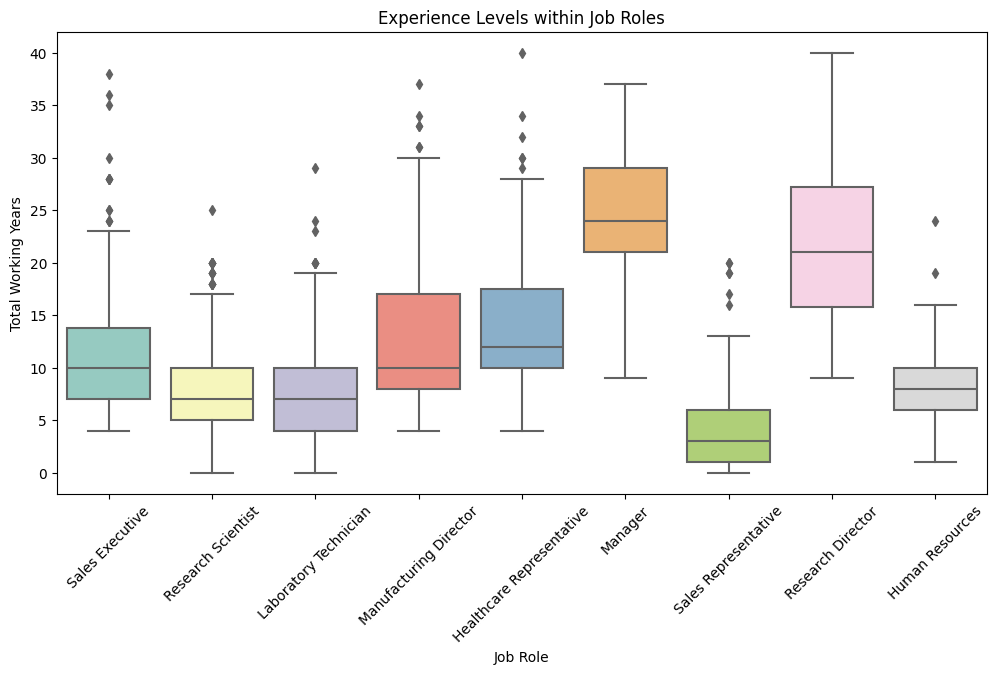

In [ ]:
# To display the experience level within each position
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='JobRole', y='TotalWorkingYears', palette='Set3')
plt.title('Experience Levels within Job Roles')
plt.xlabel('Job Role')
plt.ylabel('Total Working Years')
plt.xticks(rotation=45)
plt.show()


The roles of Manager and Reasearch Director tend to have higher experienced employees.

### Distance From Home

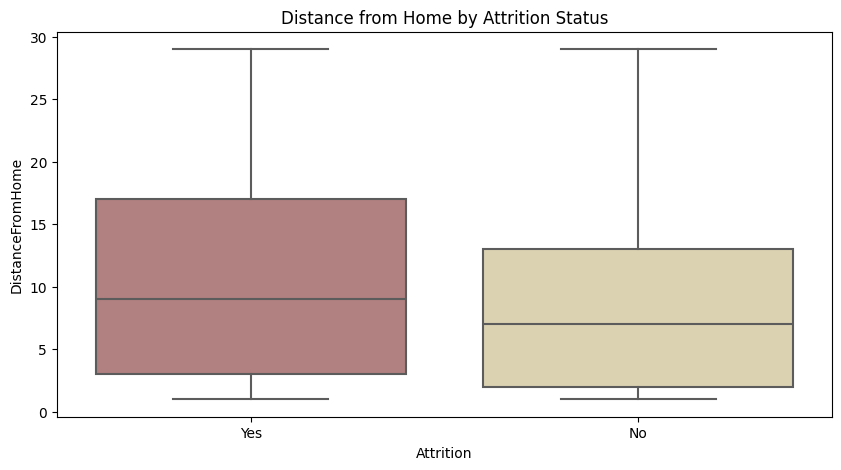

In [ ]:
# Attrition by distance from home
plt.figure(figsize=(10,5))
sns.boxplot(x="Attrition", y="DistanceFromHome", data=df, palette ='pink')
plt.title("Distance from Home by Attrition Status")
plt.show()


- Employees living farther from work have higher attrition rates due to the strain of commuting.
- So the Work Distance is a key factor for turning over.


### Environment Satisfaction

In [ ]:
df[df['Attrition'] == 'Yes']['EnvironmentSatisfaction'].value_counts().sort_values(ascending = False)

1    72
3    62
4    60
2    43
Name: EnvironmentSatisfaction, dtype: int64

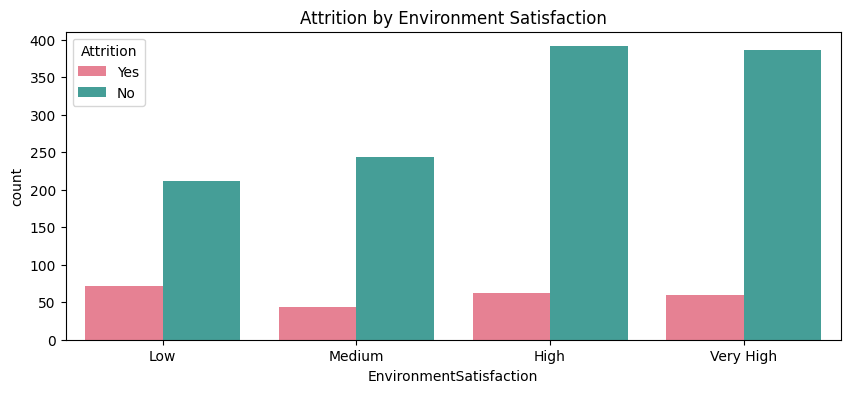

In [ ]:
# Attrition by Environment Satisfaction
plt.figure(figsize=(10,4))
sns.countplot(x="EnvironmentSatisfaction", hue="Attrition", data=df, palette ='husl')
plt.title("Attrition by Environment Satisfaction")

# Setting the labels for the x-axis
plt.xticks(ticks=[0, 1, 2, 3], labels=['Low', 'Medium', 'High', 'Very High'])

plt.show()



- Employees who are dissatisfied with their work environment are more likely to leave.
- The higher attrition rate among employees with lower environment satisfaction scores highlights the need to improve the work environment.


### Percent Salary Hike

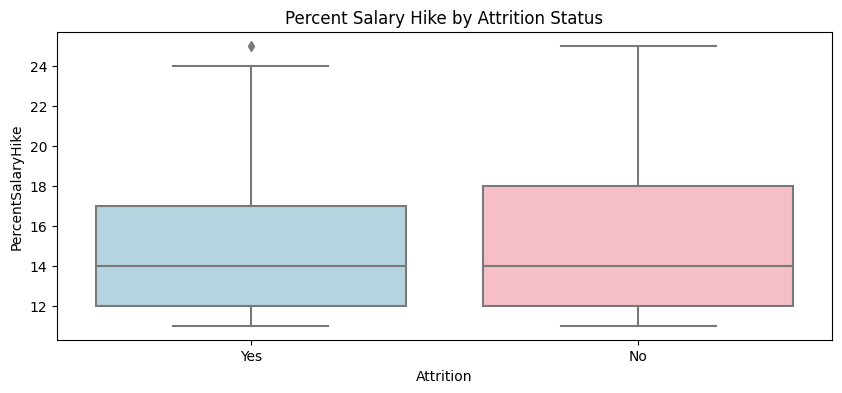

In [ ]:
# Attrition by percent salary hike
plt.figure(figsize=(10,4))
sns.boxplot(x="Attrition", y="PercentSalaryHike", data=df, palette=['#add8e6', '#ffb6c1'])
plt.title("Percent Salary Hike by Attrition Status")
plt.show()



**The percentage increase in salary might influence an employee's decision to stay or leave. Employees with lower salary hikes might feel undervalued and leave.**
- The employees who left had lower salary hikes, and this suggests that offering competitive raises could help reduce attrition.


### Stock Level

In [ ]:
df[df['Attrition'] == 'Yes']['StockOptionLevel'].value_counts().sort_values(ascending = False)

0    154
1     56
3     15
2     12
Name: StockOptionLevel, dtype: int64

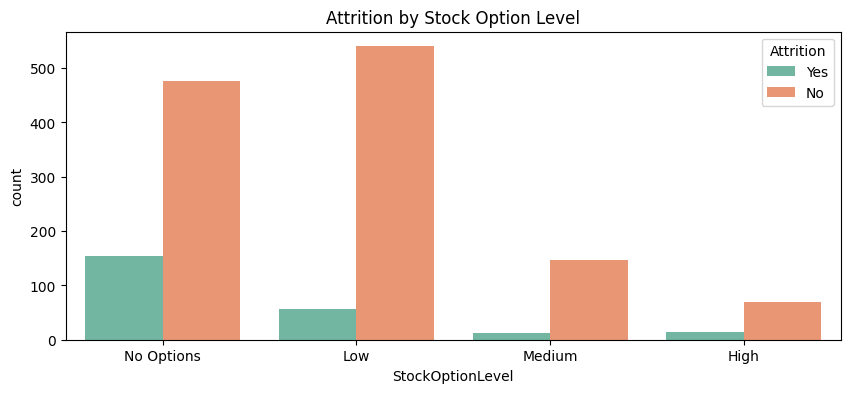

In [ ]:
# Attrition by stock level
plt.figure(figsize=(10,4))
sns.countplot(x="StockOptionLevel", hue="Attrition", data=df, palette='Set2')
plt.title("Attrition by Stock Option Level")

# Setting the labels for the x-axis
plt.xticks(ticks=[0, 1, 2, 3], labels=['No Options', 'Low', 'Medium', 'High'])

plt.show()



**Employees with stock options may be less likely to leave as they have a vested interest in the company's success.**
- The employees with higher stock option levels show lower attrition, and this could suggest that offering stock options helps retain employees.

In [ ]:
df.drop(['EmployeeCount', 'StandardHours','Over18'], axis =1, inplace=True)

# Correlation

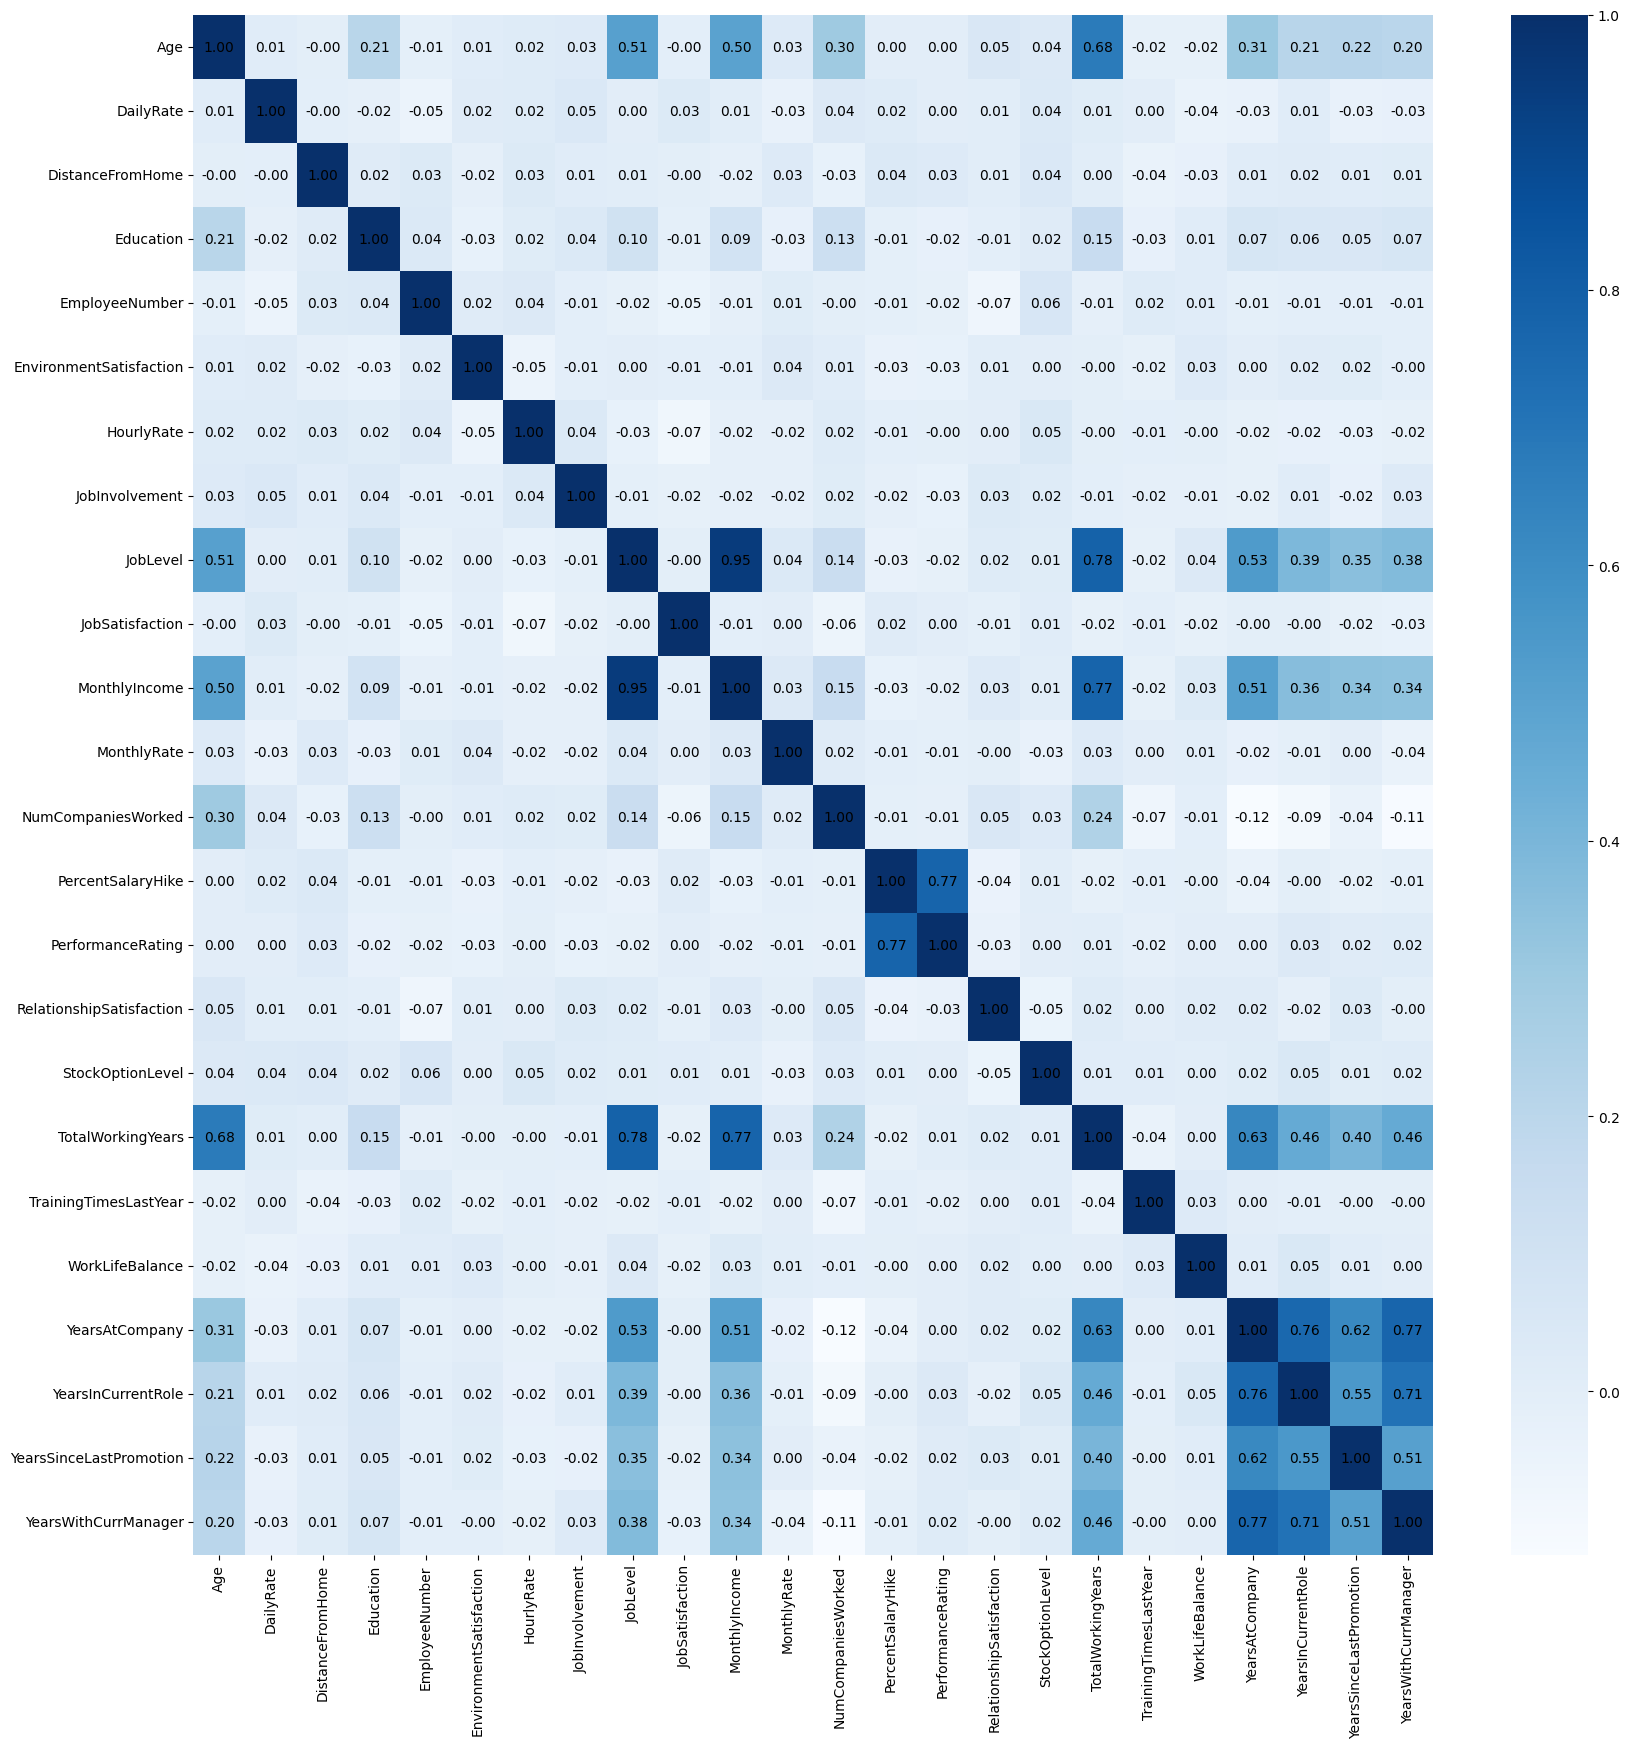

In [ ]:
# Calculate the correlation matrix
corr = df.corr()

# Create a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=False, cmap='Blues', cbar=True)

# Annotate the heatmap with correlation values
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        plt.text(j + 0.5, i + 0.5, f'{corr.iloc[i, j]:.2f}',
                 ha='center', va='center', color='black')

# Show the plot
plt.show()

**Highly correlated features:**
1. JobLevel and MonthlyIncome
2. JobLevel and TotalWorkingYears
3. MonthlyIncome and TotalWorkingYears
4. PercentSalaryHike and PerformanceRating
5. YearsAtCompany and YearsInCurrentRole
6. YearsAtCompany and YearsWithCurrManager


# First Approach

In this approach, we defineed the highly correlated features, an instead of dropping them, we have combined them and created new features, initialized the categorical features and encoded them using the OneHot Encoder, then scaled the data with StandardScaler, trained it on almost 8 classification models, therefore, tuned their hyperparameters using GridSearchCV to provide a good performance, and finally evaluated the models with the performance metrics (Accuracy, Presion, Recall, F1-Score)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

In [308]:
df = pd.read_csv('hr_employee.csv')
df.drop(['EmployeeCount', 'StandardHours','Over18'], axis =1, inplace=True)

Model: LogisticRegression
Best Parameters: {'logisticregression__C': 0.01}
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.79      0.85       247
           1       0.37      0.66      0.48        47

    accuracy                           0.77       294
   macro avg       0.65      0.72      0.66       294
weighted avg       0.84      0.77      0.79       294


Model: SVC
Best Parameters: {'svc__C': 0.1, 'svc__kernel': 'poly'}
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       247
           1       0.45      0.43      0.44        47

    accuracy                           0.83       294
   macro avg       0.67      0.66      0.67       294
weighted avg       0.82      0.83      0.82       294


Model: GaussianNB
Best Parameters: {}
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.56      0

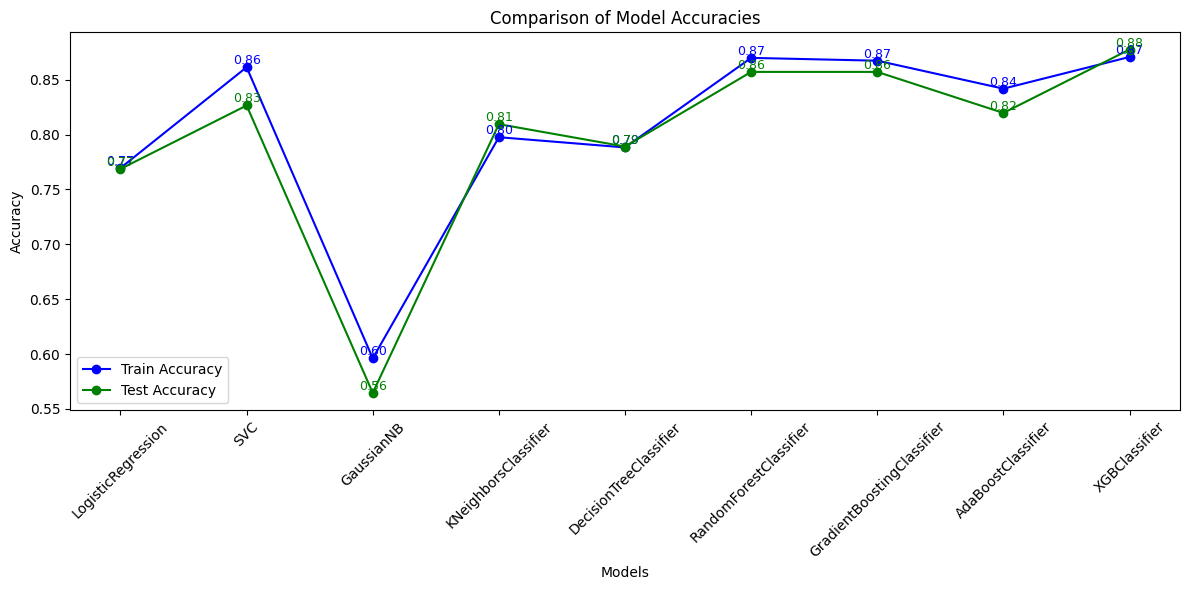

In [309]:
# Mapping target variable
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Splitting features and target
X = df.drop(columns=['Attrition'])
y = df['Attrition']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature Engineering
for dataset in [X_train, X_test]:
    dataset['IncomePerLevel'] = dataset['MonthlyIncome'] / dataset['JobLevel']
    dataset['SalaryHikeScore'] = dataset['PercentSalaryHike'] * dataset['PerformanceRating']
    dataset['YearsSinceManagerChange'] = dataset['YearsAtCompany'] - dataset['YearsWithCurrManager']
    dataset.drop(columns=['JobLevel', 'PercentSalaryHike', 'YearsAtCompany'], inplace=True)

# Identifying numerical and categorical features
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include= 'object').columns

# Initializing encoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fitting and transforming categorical features
X_train_cat = encoder.fit_transform(X_train[categorical_features])
X_test_cat = encoder.transform(X_test[categorical_features])

# Converting encoded features to DataFrame
X_train_cat_df = pd.DataFrame(X_train_cat, columns=encoder.get_feature_names_out(categorical_features), index=X_train.index)
X_test_cat_df = pd.DataFrame(X_test_cat, columns=encoder.get_feature_names_out(categorical_features), index=X_test.index)

# Dropping original categorical features from the datasets
X_train = X_train.drop(columns=categorical_features)
X_test = X_test.drop(columns=categorical_features)

# Concatenating the encoded categorical features with numerical features
X_train = pd.concat([X_train, X_train_cat_df], axis=1)
X_test = pd.concat([X_test, X_test_cat_df], axis=1)

# Initializing scaler
scaler = StandardScaler()

# Scaling the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Converting to DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# Defining models and their parameters
models = {
    'LogisticRegression': LogisticRegression(),
    'SVC': SVC(),
    'GaussianNB': GaussianNB(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'XGBClassifier': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}
# Defining hyperparameters for each model
model_params = {
    'LogisticRegression': {
        'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    },
    'SVC': {
        'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'svc__kernel': ['poly', 'rbf']
    },
    'GaussianNB': {},
    'KNeighborsClassifier': {
        'kneighborsclassifier__n_neighbors': [2, 4, 6, 8, 10],
        'kneighborsclassifier__weights': ['uniform', 'distance'],
        'kneighborsclassifier__metric': ['euclidean', 'manhattan']
    },
    'DecisionTreeClassifier': {
        'decisiontreeclassifier__criterion': ['gini', 'entropy'],
        'decisiontreeclassifier__max_depth': [5, 10, 20, 30, 40, 50],
    },
    'RandomForestClassifier': {
        'randomforestclassifier__n_estimators': [50, 100, 150, 200],
        'randomforestclassifier__max_depth': [5, 10, 20, 30],
    },
    'GradientBoostingClassifier': {
        'gradientboostingclassifier__n_estimators': [25, 50, 100, 150, 200],
        'gradientboostingclassifier__learning_rate': [0.01, 0.1, 0.2],
        'gradientboostingclassifier__max_depth': [3, 5, 7],
    },
    'AdaBoostClassifier': {
        'adaboostclassifier__n_estimators': [25, 50, 100, 150, 200],
        'adaboostclassifier__learning_rate': [0.01, 0.1, 1],
    },
    'XGBClassifier': {
        'xgbclassifier__n_estimators': [25, 50, 100, 150, 200],
        'xgbclassifier__learning_rate': [0.01, 0.1, 0.2],
        'xgbclassifier__max_depth': [3, 5, 7],
    }
}

def train_acc_predict(pipeline, X_train, X_test, y_train, y_test):
    # Hyperparameter tuning using GridSearchCV
    grid = GridSearchCV(pipeline, param_grid=pipeline.param_grid, cv=5, n_jobs=-1, scoring='accuracy')
    grid.fit(X_train, y_train)

    # Evaluating the best model
    train_acc = grid.best_score_
    y_pred = grid.best_estimator_.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    return train_acc, test_acc, report, grid.best_params_

def try_different_models(models, X_train, X_test, y_train, y_test):
    results = []
    train_accuracies = []
    test_accuracies = []

    smote = SMOTE(random_state=42)
    for model_name, model in models.items():
        # Creating a pipeline including SMOTE and the model
        pipeline = ImbPipeline([
            ('smote', smote),
            (model_name.lower(), model)
        ])
        pipeline.param_grid = model_params[model_name]

        # Training, predicting and evaluating
        train_acc, test_acc, report, best_params = train_acc_predict(pipeline, X_train, X_test, y_train, y_test)
        results.append((model_name, train_acc, test_acc, report, best_params))
        train_accuracies.append(train_acc)
        test_accuracies.append(test_acc)

        # Printing results for each model
        print(f"Model: {model_name}")
        print(f"Best Parameters: {best_params}")
        print(f"Classification Report:\n{report}\n")

    return results, train_accuracies, test_accuracies

results, train_accuracies, test_accuracies = try_different_models(models, X_train_scaled, X_test_scaled, y_train, y_test)

# Plotting the accuracies
model_names = [res[0] for res in results]
plt.figure(figsize=(12, 6))
plt.plot(model_names, train_accuracies, marker='o', label='Train Accuracy', color='b')
plt.plot(model_names, test_accuracies, marker='o', label='Test Accuracy', color='g')

# Annotating the accuracy scores on the plot
for i, (train_acc, test_acc) in enumerate(zip(train_accuracies, test_accuracies)):
    plt.text(i, train_acc, f'{train_acc:.2f}', ha='center', va='bottom', fontsize=9, color='blue')
    plt.text(i, test_acc, f'{test_acc:.2f}', ha='center', va='bottom', fontsize=9, color='green')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Second Approach

In this approach, we dropped the highly correlated features, defined the rows that have some outliers and then dropped these rows, defined the features with skewness and handled them with the best transformation method, initialized the categorical features and encoded them with OneHot Encoder, applyed the mutual information method for feature selection to select the most relevant features for modeling, handled the imbalanced data using SMOTE function, scaled it with StandardScaler, trained the models on it and used the GridSearch for hyperparameter tuning and finally evaluated the model using the performance metrics (Accuracy, Precision, Recall, and F1-Score)


In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectPercentile, mutual_info_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
from scipy.stats import zscore, skew, boxcox
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

In [292]:
df = pd.read_csv('hr_employee.csv')
df.drop(['Over18', 'EmployeeNumber','EmployeeCount','StandardHours'],axis=1, inplace =True)

In [293]:
# Defining the categorical features
category_columns=df.select_dtypes(include='object').columns.tolist()


In [294]:
numerical_columns=df.select_dtypes(include='number').columns
df_copy=df[numerical_columns]
correlation_matrix = df_copy.corr()
high_correlation_mask = np.abs(correlation_matrix) >= 0.75

highly_correlated_features = []
for feature in high_correlation_mask.columns:
    correlated_features = high_correlation_mask.index[high_correlation_mask[feature]].tolist()
    for correlated_feature in correlated_features:
        if feature != correlated_feature and correlated_feature not in highly_correlated_features:
            highly_correlated_features.append((feature, correlated_feature))

for feature1, feature2 in highly_correlated_features:
    print(f"{feature1} and {feature2} are highly correlated")

JobLevel and MonthlyIncome are highly correlated
JobLevel and TotalWorkingYears are highly correlated
MonthlyIncome and JobLevel are highly correlated
MonthlyIncome and TotalWorkingYears are highly correlated
PercentSalaryHike and PerformanceRating are highly correlated
PerformanceRating and PercentSalaryHike are highly correlated
TotalWorkingYears and JobLevel are highly correlated
TotalWorkingYears and MonthlyIncome are highly correlated
YearsAtCompany and YearsInCurrentRole are highly correlated
YearsAtCompany and YearsWithCurrManager are highly correlated
YearsInCurrentRole and YearsAtCompany are highly correlated
YearsWithCurrManager and YearsAtCompany are highly correlated


In [295]:
def get_best_threshold(z):
    for i in np.arange(3,5,0.2):
        data = df.copy()
        data = data[(z < i).all(axis=1)]
        loss = (df.shape[0] - data.shape[0]) / df.shape[0]*100
        print(f'Loss: {loss:.2}% when threshold is {i}')

In [296]:
z = np.abs(zscore(df[numerical_columns]))
get_best_threshold(z)

Loss: 5.6% when threshold is 3.0
Loss: 4.2% when threshold is 3.2
Loss: 3.1% when threshold is 3.4000000000000004
Loss: 2.7% when threshold is 3.6000000000000005
Loss: 1.8% when threshold is 3.8000000000000007
Loss: 0.88% when threshold is 4.000000000000001
Loss: 0.68% when threshold is 4.200000000000001
Loss: 0.34% when threshold is 4.400000000000001
Loss: 0.27% when threshold is 4.600000000000001
Loss: 0.14% when threshold is 4.800000000000002


In [297]:
# dropping the rows where z > 3.2
df = df[(z < 3.2).all(axis=1)]

In [298]:
# Function to plot the distribution and calculate skewness
def plot_skewness(df, column):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde=True, palette='coolwarm')
    plt.title(f'Distribution of {column} (Skewness: {skew(df[column])})')

    plt.subplot(1, 2, 2)
    sns.boxplot(df[column], palette='coolwarm')
    plt.title(f'Boxplot of {column}')

    plt.tight_layout()
    plt.show()

In [299]:
# Initial skewness check
skewness_before = df[numerical_columns].apply(skew)
print("Skewness before transformation:\n", skewness_before)

Skewness before transformation:
 Age                         0.454930
DailyRate                  -0.010847
DistanceFromHome            0.956875
Education                  -0.292313
EnvironmentSatisfaction    -0.325797
HourlyRate                 -0.033587
JobInvolvement             -0.489887
JobLevel                    1.100800
JobSatisfaction            -0.339539
MonthlyIncome               1.504586
MonthlyRate                 0.028516
NumCompaniesWorked          1.022995
PercentSalaryHike           0.798941
PerformanceRating           1.923467
RelationshipSatisfaction   -0.292213
StockOptionLevel            0.969784
TotalWorkingYears           1.107760
TrainingTimesLastYear       0.571708
WorkLifeBalance            -0.554862
YearsAtCompany              1.300996
YearsInCurrentRole          0.744596
YearsSinceLastPromotion     1.794654
YearsWithCurrManager        0.706327
dtype: float64


In [300]:
# handling the skewness
# Identify highly skewed columns
highly_skewed_columns = skewness_before[np.abs(skewness_before) > 0.5].index

# Applying transformations and compare skewness

best_transformations = {}

for col in highly_skewed_columns:
    print(f"\nProcessing column: {col}")

    # Original Skewness
    original_skewness = skew(df[col])

    # 1. Log Transformation
    if (df[col] > 0).all():
        log_transformed = np.log1p(df[col])
        log_skewness = skew(log_transformed)
        print(f"Log transformation skewness: {log_skewness}")
    else:
        log_skewness = np.inf

    # 2. Square Root Transformation
    sqrt_transformed = np.sqrt(df[col])
    sqrt_skewness = skew(sqrt_transformed)
    print(f"Square Root transformation skewness: {sqrt_skewness}")

    # 3. Box-Cox Transformation
    if (df[col] > 0).all():
        boxcox_transformed, _ = boxcox(df[col] + 1e-6)
        boxcox_skewness = skew(boxcox_transformed)
        print(f"Box-Cox transformation skewness: {boxcox_skewness}")
    else:
        boxcox_skewness = np.inf

    # Comparing and choosing the best transformation
    best_transformation = min(
        (original_skewness, 'None'),
        (log_skewness, 'Log'),
        (sqrt_skewness, 'Square Root'),
        (boxcox_skewness, 'Box-Cox'),
        key=lambda x: abs(x[0])
    )
    best_transformations[col] = best_transformation[1]
    print(f"Best transformation for {col}: {best_transformations[col]}")

    # Applying the best transformation
    if best_transformations[col] == 'Log':
        df[col] = log_transformed
    elif best_transformations[col] == 'Square Root':
        df[col] = sqrt_transformed
    elif best_transformations[col] == 'Box-Cox':
        df[col] = boxcox_transformed


Processing column: DistanceFromHome
Log transformation skewness: -0.03411245512705733
Square Root transformation skewness: 0.39361169740959273
Box-Cox transformation skewness: -0.06130670272112737
Best transformation for DistanceFromHome: Log

Processing column: JobLevel
Log transformation skewness: 0.48445215614816267
Square Root transformation skewness: 0.6351391102512344
Box-Cox transformation skewness: 0.06433533142406483
Best transformation for JobLevel: Box-Cox

Processing column: MonthlyIncome
Log transformation skewness: 0.31427795535014336
Square Root transformation skewness: 0.9326879916393022
Box-Cox transformation skewness: 0.029293211647568065
Best transformation for MonthlyIncome: Box-Cox

Processing column: NumCompaniesWorked
Square Root transformation skewness: 0.03130796573009787
Best transformation for NumCompaniesWorked: Square Root

Processing column: PercentSalaryHike
Log transformation skewness: 0.4942956097455985
Square Root transformation skewness: 0.6347462861

In [301]:
# Mapping the target variable
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

In [302]:
# Encoding the categorical features with one hot encoder
category_columns = df.select_dtypes(include='object').columns.tolist()
encoder = OneHotEncoder(drop='if_binary', sparse_output=False, handle_unknown='ignore')
encoded_cols = encoder.fit_transform(df[category_columns])
df.drop(columns=category_columns, inplace=True)
df[encoder.get_feature_names_out()] = encoded_cols

In [303]:
# Applying the mutual information method for feature selection
X = df.drop(columns='Attrition')
Y = df['Attrition']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)
mutual_info = mutual_info_classif(x_train, y_train)
mutual_info = pd.Series(mutual_info, index=x_train.columns)
mutual_info_sorted = mutual_info.sort_values(ascending=False).index


In [304]:
sel_cols = SelectPercentile(score_func=mutual_info_classif, percentile=60)
sel_cols.fit(X, Y)
sel_cols.get_feature_names_out()

array(['Age', 'DailyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
       'StockOptionLevel', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BusinessTravel_Travel_Rarely',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Research Director',
       'JobRole_Sales Representative', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'OverTime_Yes'],
      dtype=object)

In [305]:
X = df[sel_cols.get_feature_names_out()]
Y = df['Attrition']

In [306]:
# Splitting and handling the imbalanced data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)
smote = SMOTE()
X, Y = smote.fit_resample(x_train, y_train)
df_balanced = pd.concat([X, Y], axis=1)

Model: LogisticRegression
Best Parameters: {'logisticregression__C': 10}
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       189
           1       0.83      0.83      0.83       189

    accuracy                           0.83       378
   macro avg       0.83      0.83      0.83       378
weighted avg       0.83      0.83      0.83       378


Model: SVC
Best Parameters: {'svc__C': 100, 'svc__kernel': 'rbf'}
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       189
           1       0.95      0.97      0.96       189

    accuracy                           0.96       378
   macro avg       0.96      0.96      0.96       378
weighted avg       0.96      0.96      0.96       378


Model: GaussianNB
Best Parameters: {}
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.21      0.34

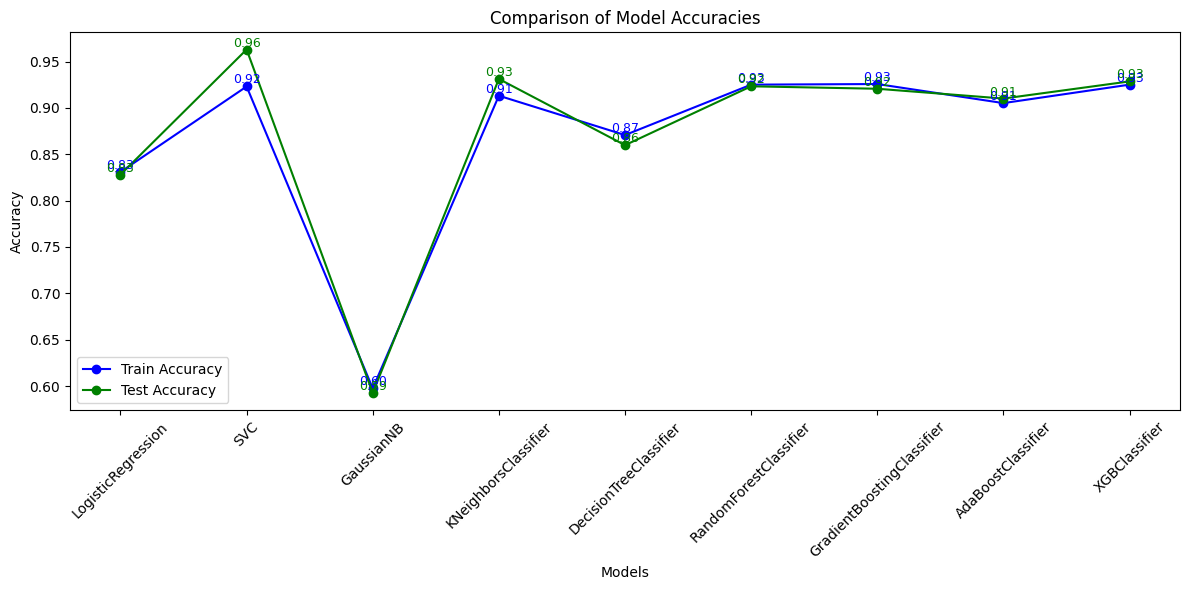

In [291]:
# Defining the models with their parameters
models = {
    'LogisticRegression': LogisticRegression(),
    'SVC': SVC(),
    'GaussianNB': GaussianNB(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'XGBClassifier': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

model_params = {
    'LogisticRegression': {
        'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    },
    'SVC': {
        'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'svc__kernel': ['poly', 'rbf']
    },
    'GaussianNB': {},
    'KNeighborsClassifier': {
        'kneighborsclassifier__n_neighbors': [3, 5, 7, 9, 11],
        'kneighborsclassifier__weights': ['uniform', 'distance'],
        'kneighborsclassifier__metric': ['euclidean', 'manhattan']
    },
    'DecisionTreeClassifier': {
        'decisiontreeclassifier__criterion': ['gini', 'entropy'],
        'decisiontreeclassifier__max_depth': [5, 10, 20, 30, 40, 50],
    },
    'RandomForestClassifier': {
        'randomforestclassifier__n_estimators': [50, 100, 150, 200],
        'randomforestclassifier__max_depth': [5, 10, 20, 30],
    },
    'GradientBoostingClassifier': {
        'gradientboostingclassifier__n_estimators': [50, 100, 150, 200],
        'gradientboostingclassifier__learning_rate': [0.01, 0.1, 0.2],
        'gradientboostingclassifier__max_depth': [3, 5, 7],
    },
    'AdaBoostClassifier': {
        'adaboostclassifier__n_estimators': [50, 100, 150, 200],
        'adaboostclassifier__learning_rate': [0.01, 0.1, 1],
    },
    'XGBClassifier': {
        'xgbclassifier__n_estimators': [50, 100, 150, 200],
        'xgbclassifier__learning_rate': [0.01, 0.1, 0.2],
        'xgbclassifier__max_depth': [3, 5, 7],
    }
}

def train_acc_predict(pipeline, x_train, x_test, y_train, y_test):
    grid = GridSearchCV(pipeline, param_grid=pipeline.param_grid, cv=5, n_jobs=-1, scoring='accuracy') # hyperparameter Tuning using GridSearch
    grid.fit(x_train, y_train)
    train_acc = grid.best_score_
    y_pred = grid.best_estimator_.predict(x_test)
    test_acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return train_acc, test_acc, report, grid.best_params_

def try_different_models(models, X, Y):
    results = []
    train_accuracies = []
    test_accuracies = []

    scaler = StandardScaler()
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

    for model_name, model in models.items():
        pipeline = Pipeline([('standardscaler', scaler), (model_name.lower(), model)])
        pipeline.param_grid = model_params[model_name]

        train_acc, test_acc, report, best_params = train_acc_predict(pipeline, x_train, x_test, y_train, y_test)
        results.append((model_name, train_acc, test_acc, report, best_params))
        train_accuracies.append(train_acc)
        test_accuracies.append(test_acc)

        print(f"Model: {model_name}")
        print(f"Best Parameters: {best_params}")
        print(f"Classification Report:\n{report}\n")

    return results, train_accuracies, test_accuracies

# Printing the results
results, train_accuracies, test_accuracies = try_different_models(models, X, Y)

# Plotting the accuracies
model_names = [res[0] for res in results]
plt.figure(figsize=(12, 6))
plt.plot(model_names, train_accuracies, marker='o', label='Train Accuracy', color='b')
plt.plot(model_names, test_accuracies, marker='o', label='Test Accuracy', color='g')

# Annotating the accuracy scores on the plot
for i, (train_acc, test_acc) in enumerate(zip(train_accuracies, test_accuracies)):
    plt.text(i, train_acc, f'{train_acc:.2f}', ha='center', va='bottom', fontsize=9, color='blue')
    plt.text(i, test_acc, f'{test_acc:.2f}', ha='center', va='bottom', fontsize=9, color='green')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Conclusion



**Summary of Findings:**

The analysis of the IBM HR Employee Attrition dataset provided valuable insights into the factors influencing employee turnover. Through exploratory data analysis (EDA), data preprocessing, and model building, we identified several key patterns and predictors of attrition:

**1. Key Factors Influencing Attrition:**

   - Job Satisfaction: Employees with lower job satisfaction were more likely to leave the company.
   - Work-Life Balance: Poor work-life balance significantly contributed to higher attrition rates.
   - Income and Career Growth: Employees with lower monthly income and fewer opportunities for career advancement (e.g., fewer years in current role or at current level) were more likely to leave.
   - Distance from Home: A longer commute distance was associated with higher attrition, indicating the importance of work location and travel requirements.

**2. Model Performance:**

   - We trained and evaluated multiple machine learning models, including Logistic Regression, KNN, SVM, Decision Tree, Random Forest, Gradient Boosting, AdaBoost, and XGBoost classifiers.
   - SVC emerged as the best-performing model, achieving an accuracy of 96% on the test dataset. This model was effective in capturing complex interactions between features due to its ensemble nature, making it robust against overfitting compared to simpler models.
   
   - While accuracy was the primary metric, we also considered precision and recall to ensure the model balanced correctly predicting attrition cases without excessive false positives.